In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np

import pandas as pd
from matplotlib.ticker import LogFormatter 
from scipy.optimize import curve_fit
from pathlib import Path
import matplotlib.colors
from matplotlib import ticker, cm
import pickle

In [2]:
data = pd.read_csv("Ising/Test_for_canonicalModel/all.txt", sep=" ")
data

,1000,0,0.1,24525.2,151.833,23051,2073.1,0.000112352,0.000553727,0.00115704,1.34761e-05,3.94372e-06,8.08754e-08,-0.000233412,0.000324005,0.00100004,9.88707e-06,3.00775e-06,6.02288e-08,13200000000
0,100,0.0,0,767.9470,0.379416,478.7810,1.439750,0.000070,0.000098,0.011479,0.000016,0.000397,1.050240e-06,-0.000089,0.000099,0.009995,0.000011,0.000298,6.495510e-07,13800000000
1,10,0.0,0,22.3339,0.000829,12.3938,0.002002,-0.000003,0.000029,0.101953,0.000009,0.032351,5.774390e-06,-0.000064,0.000034,0.100004,0.000011,0.028002,5.242210e-06,13700000000
2,150,0.0,0,1413.8000,1.061440,954.7650,5.566900,-0.000120,0.000141,0.007675,0.000010,0.000178,4.827950e-07,-0.000044,0.000155,0.006666,0.000009,0.000133,4.119850e-07,13700000000
3,250,0.0,0,3043.9100,4.099070,2287.6300,21.399800,-0.000023,0.000184,0.004612,0.000012,0.000064,3.984300e-07,-0.000081,0.000157,0.003990,0.000010,0.000048,2.453090e-07,13700000000
4,300,0.0,0,4011.2600,6.616420,3098.4900,37.439500,0.000077,0.000210,0.003874,0.000011,0.000045,2.790340e-07,-0.000100,0.000185,0.003347,0.000010,0.000034,2.049720e-07,13700000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,350,0.9,0,526.1550,4.021610,1369.7900,284.066000,1.568120,0.000683,2.465360,0.002099,6.139270,9.992420e-03,-0.028729,0.041080,0.686054,0.003510,0.555602,3.529370e-03,9000000000
105,500,0.9,0,631.7010,5.908220,2009.2500,843.124000,1.607150,0.000740,2.587050,0.002337,6.734480,1.171730e-02,-0.053908,0.104624,0.743727,0.004551,0.617707,4.672510e-03,7800000000
106,50,0.9,0,101.8260,0.059912,98.5493,0.525688,1.284830,0.000155,1.682650,0.000389,3.033490,1.359950e-03,0.001566,0.002111,0.573053,0.000329,0.454723,3.385820e-04,13000000000
107,600,0.9,0,706.4330,9.204880,6065.3600,1955.080000,1.623050,0.000870,2.637690,0.002780,6.992450,1.425030e-02,0.149034,0.122082,0.765732,0.005535,0.641847,5.801270e-03,7200000000


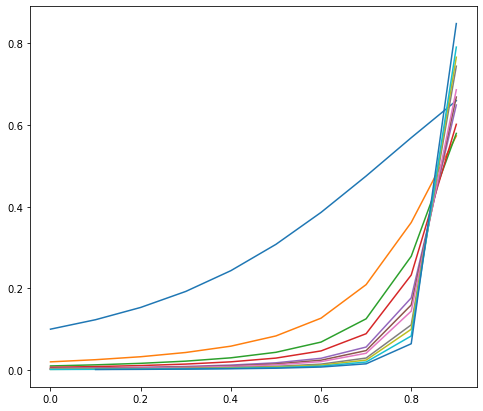

In [3]:
data_np = np.loadtxt("Ising/Test_for_canonicalModel/all.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])


fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111)


for l in lengths:
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    
    mag = data_l[:,15]
 

    plt.plot(J_l, mag)

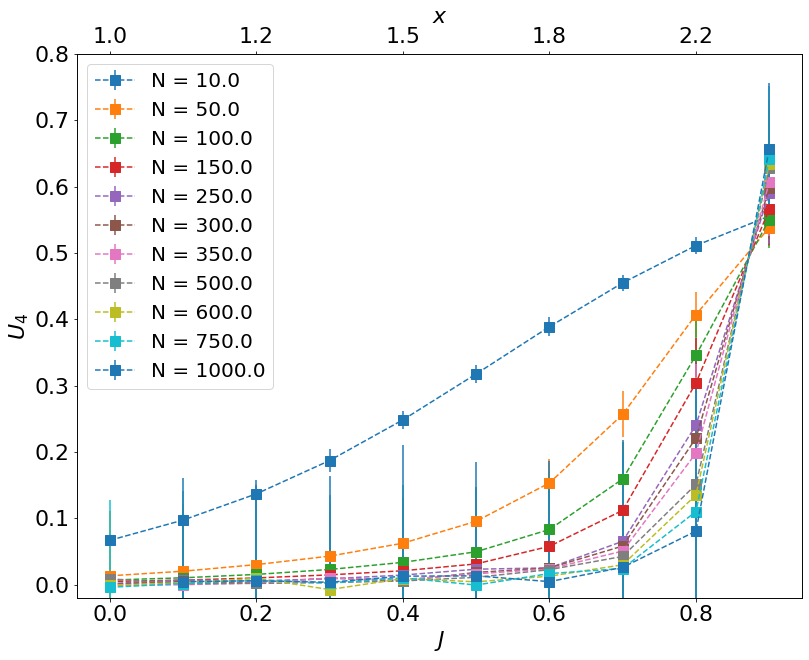

In [43]:
data_np = np.loadtxt("Ising/Test_for_canonicalModel/all.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


for l in lengths:
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    
    bc = 1 - data_l[:,17]/3/data_l[:,15]/data_l[:,15]
    errs = (2*data_l[:,16] / data_l[:,15])**2 + (data_l[:,18] /data_l[:,17])
    errs=np.sqrt(errs)

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ U_4 $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
plt.ylim(-0.02, 0.8)



plt.legend(loc="best", fontsize=20)
 
ax2 = ax.twiny() 
ax2.set_xlabel(r'$x$', fontsize=22)
ax2.set_xticks(np.arange(0,11,2)/10)
ax2.tick_params(axis='x', labelsize=22)
ax2.set_xbound(ax.get_xbound())
ax2.set_xticklabels( np.round( np.exp(np.arange(0, 11, 2)/10), 1) )

plt.savefig("/home/kamilla/Lattice_models/img/bcfar_canonical.png")

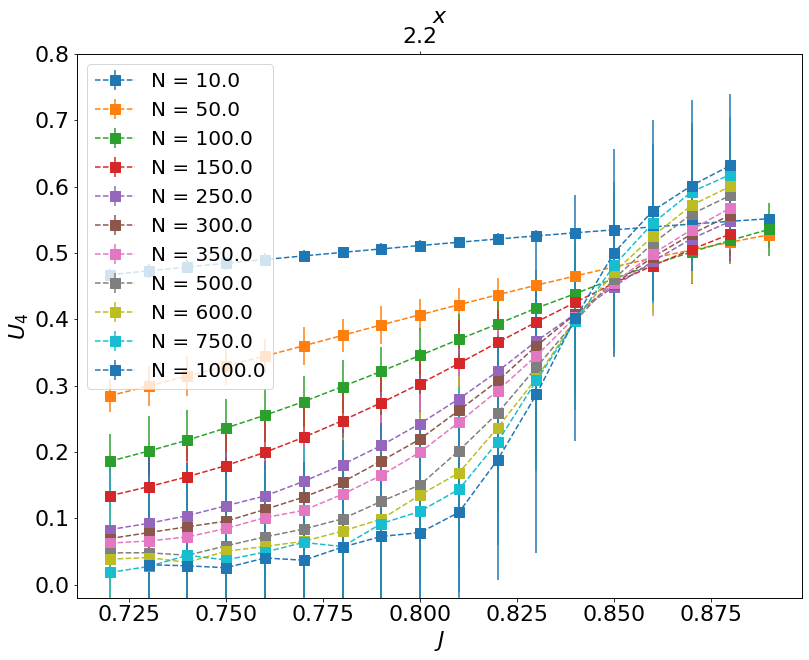

In [4]:
data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)
lengths = np.unique(data_np[:, 0])
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111)


for l in lengths:
    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]
    
    bc = 1 - data_l[:,17]/3/data_l[:,15]/data_l[:,15]
    errs = (2*data_l[:,16] / data_l[:,15])**2 + (data_l[:,18] /data_l[:,17])
    errs=np.sqrt(errs)

    plt.errorbar(J_l, bc, yerr=errs, fmt="s--", ms = 10, label = "N = " + str(l))
 
 
plt.xlabel(r'$J$', fontsize = 22)
plt.ylabel(r"$ U_4 $ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
plt.ylim(-0.02, 0.8)



plt.legend(loc="best", fontsize=20)
 
ax2 = ax.twiny() 
ax2.set_xlabel(r'$x$', fontsize=22)
ax2.set_xticks(np.arange(0,11,2)/10)
ax2.tick_params(axis='x', labelsize=22)
ax2.set_xbound(ax.get_xbound())
ax2.set_xticklabels( np.round( np.exp(np.arange(0, 11, 2)/10), 1) )

plt.savefig("/home/kamilla/Lattice_models/img/bcfar_canonical_deeper.png")

In [46]:
def r_on_n(n, nu, b):
    
    
    return 2*nu*n+b

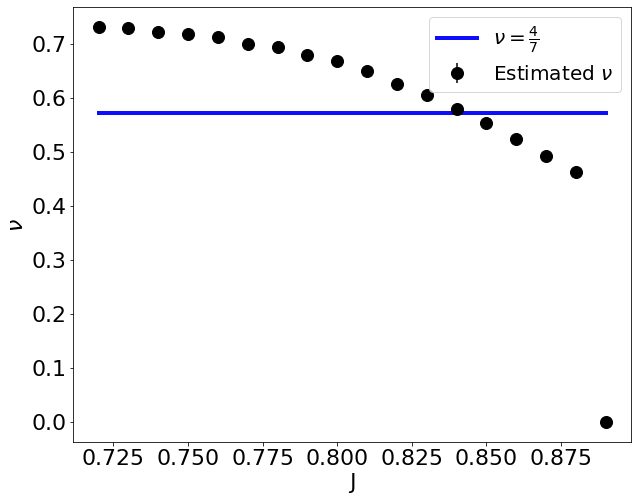

In [68]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)


data_np = np.loadtxt("Ising/Canonical_near_phase/all.txt", skiprows=1)

J_l = np.unique(data_np[:, 1])


k1=1
k2=1

e=len(J_l)
v = np.zeros(e)
sigmas = np.zeros(e)

i=0
for J in J_l[:-1]:
    data_l = data_np[data_np[:,1]==J]
    
    data_l = data_l[data_l[:,0]>99]
    #print(data_l)
    n_saw = data_l[:, 0]
    
    mean_r = data_l[:,3]
    err_r = data_l[:,4] 
    popt, pcov = curve_fit(r_on_n, np.log(n_saw+k2), np.log(mean_r+k1), sigma=err_r )  
    v[i] = popt[0]
    perr = np.sqrt(np.diag(pcov))

    
    perr = np.sqrt(np.diag(pcov))
    sigmas[i] =perr[0]
    i+=1
    
    
plt.errorbar( J_l, v , yerr=sigmas, fmt="o", ms = 12,c="k", label = r"Estimated $\nu$")


plt.plot([J_l[0], J_l[-1]], [4/7, 4/7], "-", label=r"$\nu=\frac{4}{7}$", c="b",lw=4, alpha=0.95)

plt.xlabel(r'J', fontsize = 22)
plt.ylabel(r"$\nu$ ", fontsize=22)
plt.tick_params(axis='x', labelsize=22) 
plt.tick_params(axis='y', labelsize=22) 
#ax.set_xticks(np.arange(0, 1, 0.1))

theta = 1.0/1.18

#plt.plot([theta], [4.0/7.0], "*", c= "purple", ms=15)

plt.legend(loc="best", fontsize=20)
    